# Regressão Linear - Prática

In [155]:
# Importando libs necessárias:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [156]:
# Carregando o data set:

df = pd.read_csv('2019.csv')

life_expectancy = df['Healthy life expectancy']
score = df['Score']

display(df)
df = df.drop(columns=['Overall rank','Country or region'])
display(df)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


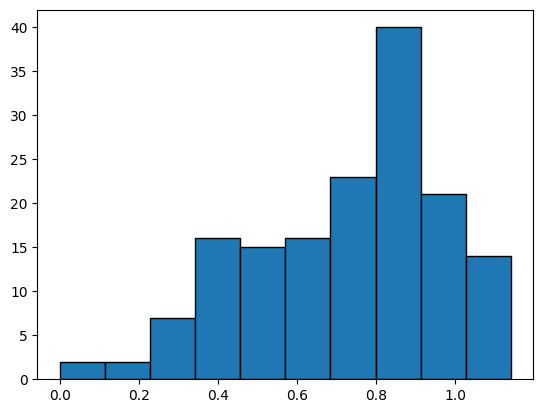

In [157]:
plt.hist(life_expectancy, bins = 10, edgecolor = (0,0,0))
plt.show()

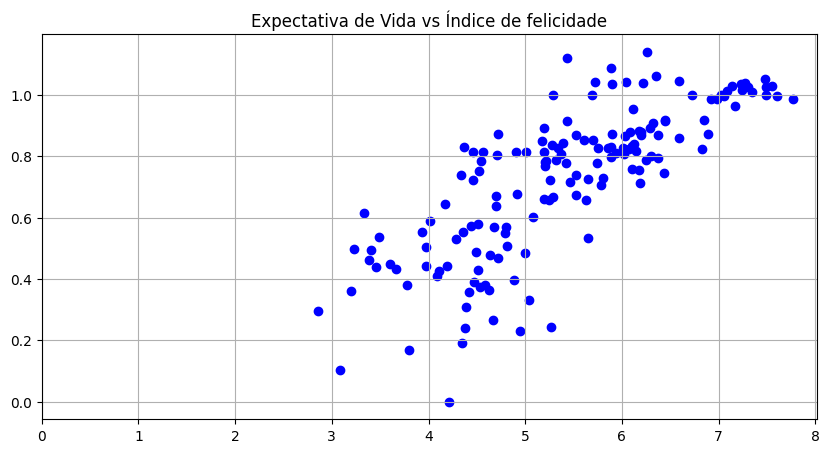

In [158]:
plt.figure(figsize=(10,5))
plt.scatter(score, life_expectancy, color = 'blue')
plt.grid()
plt.title('Expectativa de Vida vs Índice de felicidade')
plt.xticks([i for i in range(9)])

plt.show()

In [159]:
# Analisando índice de correlação:

corr = df.corr()
corr

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


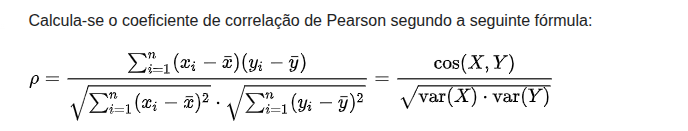

In [160]:
X = np.array(score)
y = np.array(life_expectancy)

In [161]:
def corr_person(x, y):

    x_bar = np.mean(x)
    y_bar = np.mean(y)

    s_1 = np.sum((x - x_bar) * (y - y_bar))

    s_2 = np.sum((x - x_bar)**2) * np.sum((y - y_bar)**2)

    r = s_1/(s_2**0.5)

    return r

r = corr_person(X, y) # Um bom coeficiente de correlação
print(r)

0.779883149242583


In [162]:
# Implementando a regressão:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.40, random_state=42)
model = LinearRegression().fit(X_train, y_train)

w = model.coef_[0]
b = model.intercept_

print(f'coeficiente (w) = {w}')
print(f'y - intercepto (b) = {b}')

y_hat = model.predict(X_test)

coeficiente (w) = 0.16689286110375884
y - intercepto (b) = -0.15860549717330175


In [164]:
r2 = r2_score(y_test, y_hat)
print(f'Coeficiente de determinação: {r2}') #Explicabilidade Moderada

Coeficiente de determinação: 0.5182180362299152


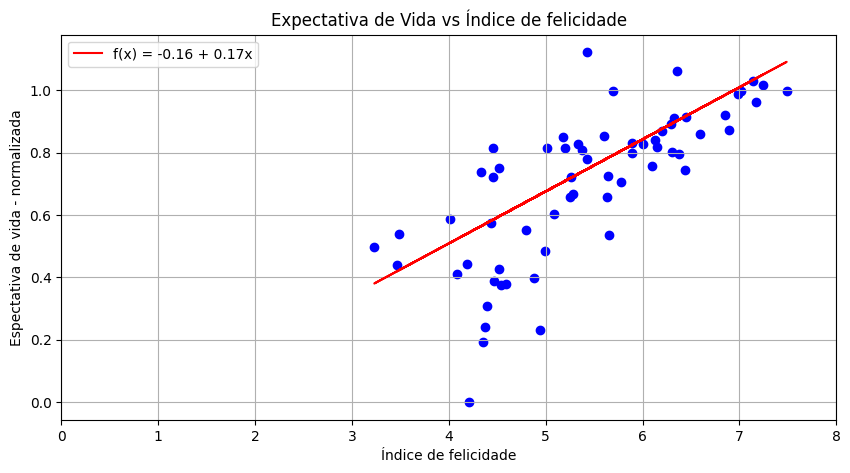

In [165]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_hat, color = 'red', label = f'f(x) = {b:.2f} + {w:.2f}x')
plt.grid()
plt.title('Expectativa de Vida vs Índice de felicidade')
plt.xticks([i for i in range(9)])
plt.ylabel('Espectativa de vida - normalizada')
plt.xlabel('Índice de felicidade')
plt.legend()

plt.show()